# Project: Investigating a Dataset on No Show Appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

***

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. Examples of some of the characteristics included in the dataset are as follows:
>
>- 'ScheduledDay’ tells us on what day the patient set up their appointment.
>- ‘Neighborhood’ indicates the location of the hospital.
>- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
>- Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
>
>The aim of this analysis is to determine whether we could predict a no-show on the basis of descriptive statistics that we would analyze in this dataset. The dependent variable for our analysis would be the 'No-show' variable. We could choose our independent variables on the basis of our research questions. Some of the research questions for this dataset are as follows:
>
>1. Is there a trend between age and no-show variable, i.e. do young people tend to not show up for their appointments?
>2. Does receiving an SMS lower the amount of no-shows?
>3. Does having or not having scholarship affect the no-show rate?

In [6]:
# importing statements for all of the packages that are planned to be used in this analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

***
<a id='wrangling'></a>
## Data Wrangling

> Let us load in the data, check for cleanliness, and then trim and clean our dataset for analysis. 

### Analyzing the general properties

In [16]:
# loading our data and printing out a few lines. 
df = pd.read_csv('no_show_data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# let us determine the number of rows and columns in the dataset.
df.shape

(110527, 14)

In [11]:
# let us evaluate and analyze the summary of the statistical information in the dataset.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Checking for any missing data

In [12]:
# let us examine the data types of all the columns in the dataset. This would also give us info about any missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


It is evident from the above result that all the columns have 110527 values in them and there are no missing values. Now let us check whether the dataset has any duplicated rows or not.

### Checking for Duplicated or Redundent Data

In [14]:
sum(df.duplicated())

0

That's great! Our data does not contain any redundency. Now let's start **cleaning** the dataset. 

***
<a id='cleaning'></a>
## Data Cleaning 

Firstly let's format the column names a bit to convert all of them to lowercase. That would make the column names consistent.

In [21]:
# changing columns names to lower case
df.columns = df.columns.str.lower()
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


That's better!

Now, one of our questions can be related to the relationship between the duration of scheduled day and appointment day. For instance, if the waiting time is too long, the patient's health may have improved naturally and he/she may have chosen to not go for the booked appointment.

For that, lets extract just the dates from these columns first, convert them to datetime types, and then subract them to fins the waiting time in days.

In [30]:
# strip scheduledday and appointmentday columns and just keep the dates for further analysis
split_columns = ['scheduledday', 'appointmentday']

for c in split_columns:
    df[c] = df[c].apply(lambda x: x.split("T")[0])

In [35]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now before computing the waiting time by subtracting the 'scheduledday' and 'appointmentday', we will have to check the datatypes of both the columns and make sure that both are in a datetime format as vectorized operations are not possible on strings.

In [40]:
# Checking the datatypes
df.dtypes

patientid         float64
appointmentid       int64
gender             object
scheduledday       object
appointmentday     object
age                 int64
neighbourhood      object
scholarship         int64
hipertension        int64
diabetes            int64
alcoholism          int64
handcap             int64
sms_received        int64
no-show            object
dtype: object

In [41]:
# Changing the datatype to datetime 
change_dt = ['scheduledday', 'appointmentday']

for c in change_dt:
    df[c] = pd.to_datetime(df[c])

In [42]:
df.dtypes

patientid                float64
appointmentid              int64
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no-show                   object
dtype: object

Now that the datatypes are correct. Now lets subtract to determine the waiting time as 'day_diff'.

In [47]:
df['day_diff'] = df['appointmentday'] - df['scheduledday']

Great!

Now, if we look our target variable is a categorical variable. Since our analysis is limited for initial exploration on descriptive statistics, let's convert the 'no-show' variable to a quantitative int type, where a No--no show is 0 and Yes--No Show is 1. 

In [63]:
def num(x):
    if x == 'No':
        return 0
    else:
        return 1

In [64]:
df['no-show'] = df['no-show'].apply(num)

In [65]:
# let's visualize the dataset to check our dataset.
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,day_diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0 days
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0 days
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0 days
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0 days
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0 days


In [93]:
df.groupby('no-show').count()['patientid']

no-show
0    88208
1    22319
Name: patientid, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> Now firstly, let us have a look at the statistical information and visualization about the data as a whole. 

In [83]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,day_diff
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,10 days 04:24:31.828602
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,15 days 06:07:11.673762
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6 days +00:00:00
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4 days 00:00:00
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15 days 00:00:00
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179 days 00:00:00


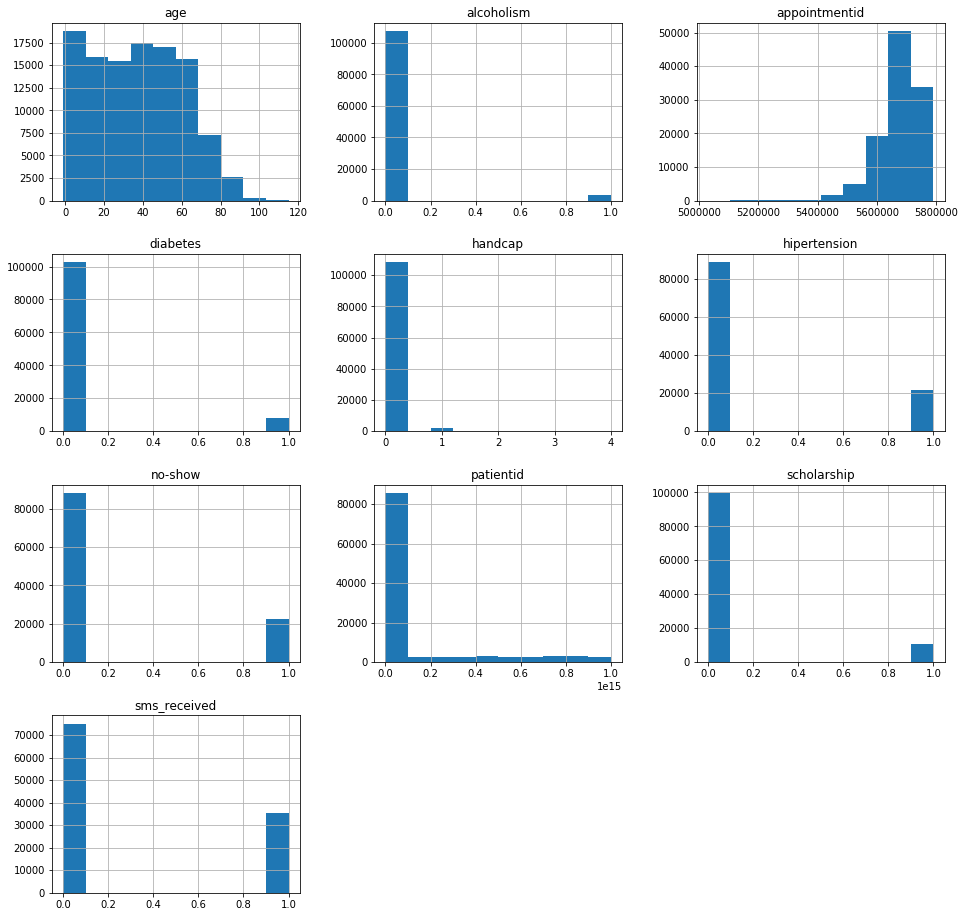

In [74]:
df.hist(figsize=(16,16));

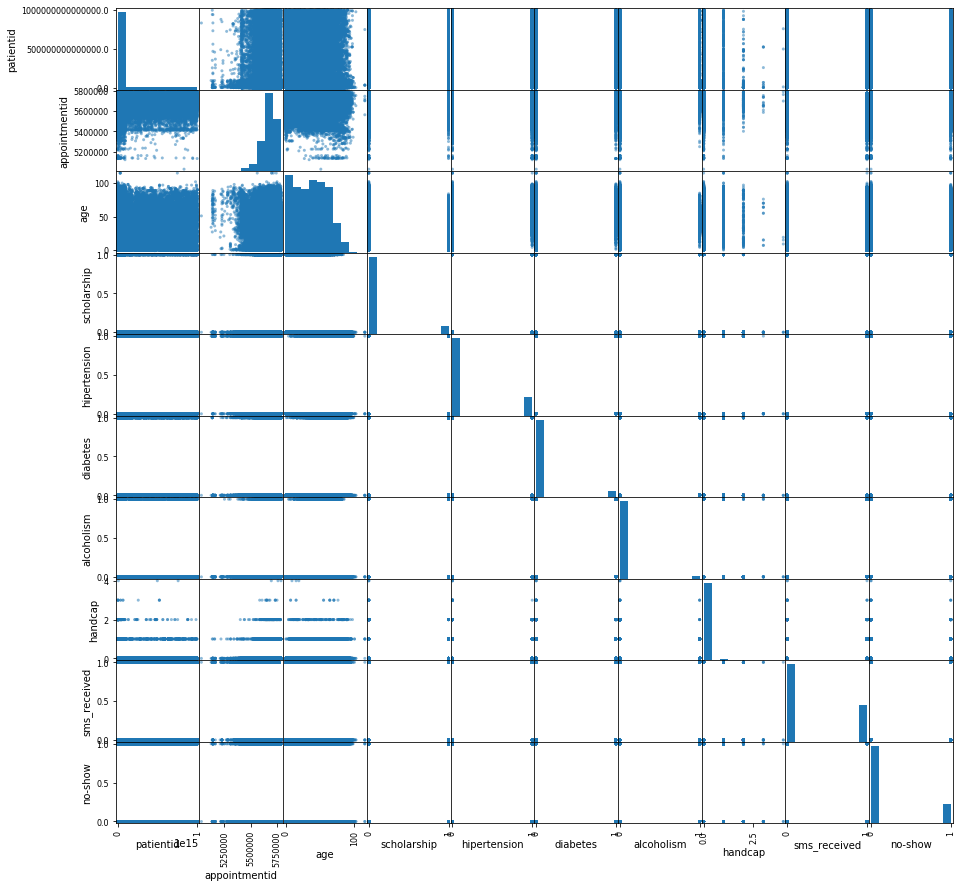

In [75]:
pd.plotting.scatter_matrix(df,figsize=(15,15));

Looking at the histogram and scatterplots above, we get a general idea about the dataset but let's dive deeper to answer our research questions first.

Now to answer our questions and for better comparison and analysis, it would be better to divide the dataset into two subsets. First subset would be where the no-shows were Yes and second would be where the no-show would be False.

#### Dividing the dataframe for better comparison in future, wherever needed.

In [138]:
df_ns_y = df[df['no-show'] == 1] # no show as Yes
df_ns_n = df[df['no-show'] == 0] # no show as No

### Research Question 1: Is there a trend between age and no-show variable, i.e. do young people tend to not show up for their appointments?

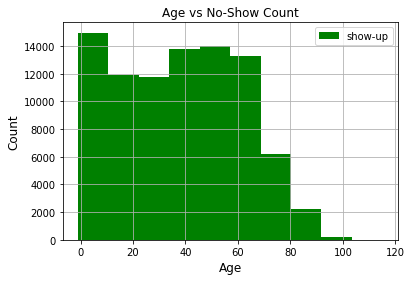

In [241]:
df_ns_n.age.hist(label='show-up', color='g')
plt.legend()
plt.title('Age vs No-Show Count')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12);

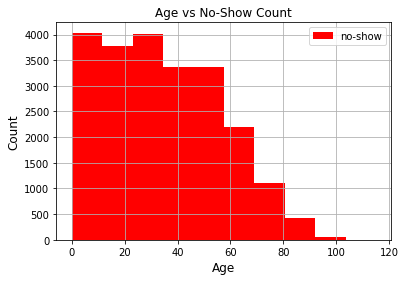

In [242]:
df_ns_y.age.hist(label='no-show', color='r')
plt.legend()
plt.title('Age vs No-Show Count')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12);

Interpretation: 
>Comparing both the charts of Age vs No-show count, we see that in the population graph for showed up data (represented in green), it had a less proportion of people in their 10-30 age group vs 30-50 age group.
>
>Whereas, in the population that did not show up, represented in red, the population is considerably high in their 10-30 age group vs 30-50 age group.
>
>This does tend to give an impression that people of young age tend to give more amount of no-shows then the people of older age. It is however worthwhile to note that our analysis is introductory and just descriptive for exploratory analysis. We would have to use inferential statistics and advanced analytics techniques to prove our interpretation. This is valid for all of our interpretations in the notebook.

### Research Question 2: Does receiving an SMS lower the amount of no-shows?

Since there was a large difference between thw people receiving the messages and not receiving, it would be best to proportionate the dataset.

In [227]:
#Forming different datasets according to whether they recieved the message or not
df_sms_y = df[df['sms_received'] == 1]
df_sms_n = df[df['sms_received'] == 0]
#proportioning the data to compare no show and sms received, as the amount of people who didn't recieve the sms is very high. 
total_sms_received = df_sms_y.count()['patientid']
count_sms_received_grouped = df_sms_y.groupby(['no-show']).count()['patientid']
total_sms_not_received = df_sms_n.count()['patientid']
count_sms_not_received_grouped = df_sms_n.groupby(['no-show']).count()['patientid']
p1 = count_sms_received_grouped/total_sms_received
p2 = count_sms_not_received_grouped/total_sms_not_received

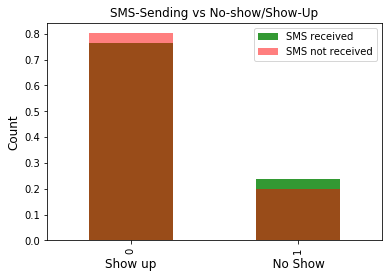

In [252]:
#plotting the graph
p1.plot(kind='bar', alpha=0.8, label='SMS received', color ='g', title='SMS-Sending vs No-show/Show-Up')
p2.plot(kind='bar', alpha=0.5, label='SMS not received', color ='r')
plt.xlabel('Show up                              No Show', fontsize=12)
plt.ylabel('Count', fontsize=12);
plt.legend();

Interpretation: 
>Based on the results from the graph, it shows that sending a sms does not affect the no-show rate positively. We can see from the graph that the green bar indicating the SMS Received Status is higher than the red bar, for the No-show Column. 
>
>Although this result shows a negative relation between the two variables, this should not be concluded because the population that recieved the SMS was very less compared to the other group. We can have a look at the comparison between the population to whom the SMS was sent or not sent in a rough graph below.

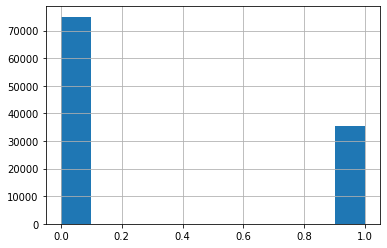

In [251]:
# quick analysis for the count of people to whom the sms were sent.
df['sms_received'].hist();

### Research Question 3: Does having or not having scholarship affect the no-show rate?

Since there was a large difference between thw people receiving the scholarship and not receiving, it would be best to proportionate the dataset.

In [234]:
df_sch_y = df[df['scholarship'] == 1]
df_sch_n = df[df['scholarship'] == 0]
total_sch_received = df_sch_y.count()['patientid']
count_sch_received_grouped = df_sch_y.groupby(['no-show']).count()['patientid']
total_sch_not_received = df_sch_n.count()['patientid']
count_sch_not_received_grouped = df_sch_n.groupby(['no-show']).count()['patientid']
p1 = count_sch_received_grouped/total_sch_received
p2 = count_sch_not_received_grouped/total_sch_not_received

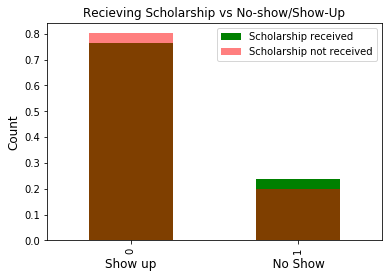

In [247]:
p1.plot(kind='bar', label='Scholarship received', color ='g', title='Recieving Scholarship vs No-show/Show-Up')
p2.plot(kind='bar', alpha=0.5, label='Scholarship not received', color ='r')
plt.xlabel('Show up                              No Show', fontsize=12)
plt.ylabel('Count', fontsize=12);
plt.legend();

Interpretation: 
>Based on the results from the graph, it shows that having a scholarship does not affect the no-show rate positively. We can see from the graph that the green bar indicating the Scholarship received Status is higher than the red bar, for the No-show Column. However this should not imply statistical conclusion and further analysis in detail like reserving a validation set and confirming our result to finalize our interpretation.  

<a id='conclusions'></a>
## Conclusions

>From our introductory analysis we have found our results to the research questions that we posed. As said earlier, our results do not indicate causation from our correlation. Having said that, we found that:
>
>1. Youngsters have shown to have more No-shows
>2. Receiving an SMS did not show a positive impact on the No-show rate.
>3. Having a Scholarship showed to have more no-shows.
>
>Further explanatory analysis in detail will conclude whether these claims are true or false.